In [15]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt 
import seaborn as sns 

In [16]:
df = pd.read_csv('../../../datasets/titanic.csv' , usecols=['Age' , 'Fare' , 'Survived'])
df.sample(10)

,Survived,Age,Fare
503,0,37.0,9.5875
608,1,22.0,41.5792
403,0,28.0,15.8500
456,0,65.0,26.5500
749,0,31.0,7.7500
235,0,NaN,7.5500
719,0,33.0,7.7750
181,0,NaN,15.0500
825,0,NaN,6.9500
748,0,19.0,53.1000


In [17]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [18]:
x = df.drop(columns = ['Survived'])
y = df['Survived']

# train test split and other steps 


In [19]:
x['Age_imputed'] = x['Age']

In [20]:
def ramdom_imputation (df , column) : 
    non_null_values = df[column].dropna()
    df[column] = df[column].apply(lambda x : np.random.choice(non_null_values) if pd.isna(x) else x)

ramdom_imputation(x , 'Age_imputed')

In [21]:
x.sample(10)

,Age,Fare,Age_imputed
606,30.0,7.8958,30.0
827,1.0,37.0042,1.0
135,23.0,15.0458,23.0
372,19.0,8.0500,19.0
160,44.0,16.1000,44.0
157,30.0,8.0500,30.0
127,24.0,7.1417,24.0
738,NaN,7.8958,26.0
288,42.0,13.0000,42.0
643,NaN,56.4958,74.0


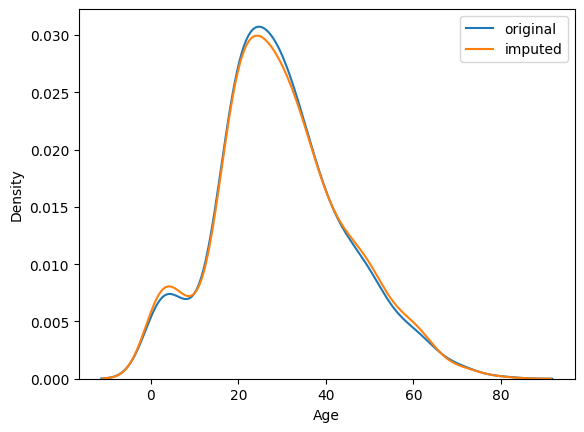

In [31]:
# The distribution of data after Random Imputation is almost similar whereas the covariance changes

sns.kdeplot(x['Age'] , label = 'original')
sns.kdeplot(x['Age_imputed'] , label = 'imputed')

plt.legend()
plt.show()

In [33]:
x.cov()

,Age,Fare,Age_imputed
Age,211.019125,73.849030,211.019125
Fare,73.849030,2469.436846,67.399171
Age_imputed,211.019125,67.399171,219.223672
